<a href="https://colab.research.google.com/github/prakharagrawal10/deep-learning/blob/main/MCSE603P_Deep_Learning_LAB_4_Digit_Recongnition_Samkhya_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Digit Recognition Using Machine Learning**

Here is a small example for recognizing digit. We call the model as Samkhya. You can run the code below, block by block. The best way to learn is by doing


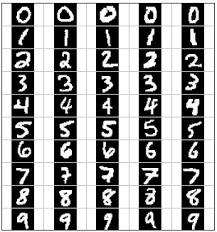

TensorFlow: model tracking for prediction

Matplotlib: to plot graphs

Keras: API for TensorFlow

Tensorflow.keras.models: to build a machine learning model. We will import Sequential ( a stack of layers with only one input tensor and one output tensor).

Sklearn.model: to split the data into a training set and a test set

Tensorflow.keras.layers: importing different layers to implement deep learning.

The description of the layers is mentioned below –
Dense: creating feed-forward neural networks, meaning that every input and every output is dependent reciprocally.

Flatten: serializing multi-dimensional tensor.

Dropout: to prevent overfitting.

conv2D: a 2D convolution layer to maintain the relation between pixels of image data.

MaxPooling2D: reduce the spatial size.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import matplotlib.pyplot as plt

In [ ]:
(TrainIn, TrainOut), (TestIn, TestOut) = datasets.mnist.load_data()
TrainIn = TrainIn.reshape(60000,28,28,1)
TestIn = TestIn.reshape(10000,28,28,1)
TrainOut = to_categorical(TrainOut)
TestOut = to_categorical(TestOut)


11490434/11490434 [==============================] - 0s 0us/step


(i) Building a Deep Neural Net

In [ ]:
Samkhya = Sequential()
# Add Flatten/Dense Layers
Samkhya.add(Flatten(name='F1'))
Samkhya.add(Dense(100, activation='softmax',name='D1'))
Samkhya.add(Dense(100, activation='softmax',name='D2'))
Samkhya.add(Dense(10, activation='softmax',name='D3'))

Samkhya.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

In [ ]:
TrainingLog=Samkhya.fit(TrainIn, TrainOut,epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0900 - accuracy: 0.1132 - val_loss: 0.0900 - val_accuracy: 0.1050
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0900 - accuracy: 0.1132 - val_loss: 0.0900 - val_accuracy: 0.1050
Epoch 3/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0900 - accuracy: 0.1132 - val_loss: 0.0900 - val_accuracy: 0.1050
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0900 - accuracy: 0.1132 - val_loss: 0.0900 - val_accuracy: 0.1050
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0900 - accuracy: 0.1132 - val_loss: 0.0900 - val_accuracy: 0.1050
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0900 - accuracy: 0.1132 - val_loss: 0.0900 - val_accuracy: 0.1050
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0900 - accuracy: 0.1132 - val_loss: 0.0900 - val_accuracy:

**Activity 1:**

Execute the above Multi Layer Perceptron and comment on the learning Accuracy

**Activity 2:**
Try Changing the hyper parameters and develop a better MLP for classification

In [ ]:
Samkhya = Sequential()
# Add classification  layer
Samkhya.add(Flatten(name='flatten'))
Samkhya.add(Dense(10, activation='sigmoid',name='dense1'))
Samkhya.add(Dense(10, activation='softmax',name='dense2'))
Samkhya.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[ 'categorical_accuracy'])

In [ ]:
TrainingLog=Samkhya.fit(TrainIn, TrainOut,epochs=20, validation_split=0.1)

In [ ]:
print(Samkhya.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense1 (Dense)              (None, 10)                7850      
                                                                 
 dense2 (Dense)              (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
plt.plot(TrainingLog.history['categorical_accuracy'], label='Train_accuracy')
plt.plot(TrainingLog.history['val_categorical_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

**Testing the Model**

In [ ]:
Samkhya.evaluate(TestIn, TestOut)

313/313 [==============================] - 1s 2ms/step - loss: 0.4383 - categorical_accuracy: 0.8775


[0.43825796246528625, 0.8774999976158142]

In [ ]:
image_index = 44
plt.imshow(TestIn[image_index].reshape(28, 28),cmap='Greys')
pred = Samkhya.predict(TestIn[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

**Activity 3 :**
Change the image index in the above cell and check whether prediction and actual image labelling matches .

Summarize your observation

In [ ]:
predicted_classes1 = Samkhya.predict(TestIn)
predicted_classes1=tf.argmax(predicted_classes1,axis=1)
predicted_classes1

313/313 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([7, 2, 1, ..., 4, 8, 6])>

In [ ]:
actual1 = tf.argmax(TestOut,axis=1)
actual1

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([7, 2, 1, ..., 4, 5, 6])>

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns
cm = confusion_matrix(actual1, predicted_classes1)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [ ]:
Classes = ["Zero","One","Two","Three","Four", "Five", "Six", "Seven", "Eight", "Nine"]
print(classification_report(actual1, predicted_classes1, target_names=Classes))

(ii) Deep Convnets

In [ ]:
Samkhya1 = Sequential()
#add Convolution  Layers
Samkhya1.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1),name='c1'))
Samkhya1.add(MaxPooling2D(pool_size=(2, 2)))
Samkhya1.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1),name='c2'))
Samkhya1.add(MaxPooling2D(pool_size=(2, 2)))


# Add Flatten/Dense Layers
Samkhya1.add(Flatten(name='F1'))
Samkhya1.add(Dense(10, activation='softmax',name='D1'))

Samkhya1.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

In [ ]:
print(Samkhya1.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 c1 (Conv2D)                 (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 c2 (Conv2D)                 (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 F1 (Flatten)                (None, 1600)              0         
                                                                 
 D1 (Dense)                  (None, 10)               

In [ ]:
TrainingLog=Samkhya1.fit(TrainIn, TrainOut,epochs=10, validation_split=0.1)

In [ ]:
plt.plot(TrainingLog.history['accuracy'], label='Train_accuracy')
plt.plot(TrainingLog.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# **Testing the Digit Recognition**

In [ ]:
[Socre0,Score1]=Samkhya1.evaluate(TestIn, TestOut)

313/313 [==============================] - 5s 15ms/step - loss: 0.0035 - accuracy: 0.9777


In [ ]:
print("The confidence score is",Score1)

The confidence score is 0.9776999950408936


In [ ]:

plt.imshow(TestIn[10].reshape(28, 28),cmap='gray')


In [ ]:
pred = Samkhya1.predict(TestIn[10].reshape(1, 28, 28, 1))
print("The Samkhya predicted is",pred.argmax())

1/1 [==============================] - 0s 77ms/step
The Samkhya predicted is 0


In [ ]:
predicted_classes = Samkhya1.predict(TestIn)
predicted_classes=tf.argmax(predicted_classes,axis=1)
predicted_classes

313/313 [==============================] - 8s 24ms/step


<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([7, 2, 1, ..., 4, 5, 6])>

In [ ]:
actual = tf.argmax(TestOut,axis=1)
actual

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([7, 2, 1, ..., 4, 5, 6])>

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

import seaborn as sns
cm = confusion_matrix(actual, predicted_classes)
cm
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)

In [ ]:
Classes = ["Zero","One","Two","Three","Four", "Five", "Six", "Seven", "Eight", "Nine"]
print(classification_report(actual, predicted_classes, target_names=Classes))

Let us try uploading handwrtitten digits from laptop/system

In [ ]:
import PIL
from PIL import  ImageEnhance , ImageOps
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
aksharam = PIL.Image.open('poojyam.png')
plt.imshow(aksharam)

In [ ]:
aksharam1 = ImageOps.grayscale(aksharam)
plt.imshow(aksharam1,cmap='gray')
newsize = (28, 28)
aksharam2=aksharam1.resize(newsize)
plt.imshow(aksharam2,cmap='gray')
aksharam2.size

In [ ]:
aksharam3= img_to_array(aksharam2)
aksharam3= aksharam3.reshape(1, 28, 28, 1)
predictions = Samkhya.predict(aksharam3)
print("The Samkhya predicted is",predictions.argmax())

NameError: ignored

Activity : Build other models with  train and test images of ratio 60:40 , 70:30 and 80:20

Compare the differnt models in terms of model parmaters, accuracy and hyper parameters